In [1]:
import pandas as pd
df = pd.read_csv("D:/Tugas Akhir/Codingan/Development/App/data/df_train_YESUSFIX.csv")
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM13274,Kota Jakarta Timur,Perempuan,1999-01-23,2021-11-30,2023-02-02,Single,0,D2,4.0,...,4.341320e+07,3.100943e+06,1.12750,Mid-term,2.800000,1,3.100943e+06,3,1.033648e+06,1.8
1,EM10730,Tangerang,Laki-laki,1998-04-12,2023-01-31,2024-03-16,Single,0,SLTA,2.0,...,1.489849e+07,1.146038e+06,1.22500,Mid-term,4.333333,1,1.146038e+06,1,1.146038e+06,2.6
2,EM4510,Kabupaten Bekasi,Laki-laki,1981-06-10,2021-10-30,2023-12-15,Married,2,SLTA,0.0,...,2.003449e+08,2.671265e+06,1.18125,Mid-term,25.000000,4,2.003449e+06,1,8.013796e+06,3.0
3,EM2622,Kabupaten Bekasi,Laki-laki,1981-07-26,2021-09-13,2023-10-31,Married,3,SLTA,0.0,...,2.537505e+08,2.537505e+06,1.22000,Mid-term,25.000000,4,2.537505e+06,1,1.015002e+07,4.0
4,EM0633,Kota Jakarta Pusat,Laki-laki,1988-07-07,2022-08-22,2023-10-01,Married,1,SLTA,8.0,...,3.312456e+07,1.274022e+06,1.18250,Mid-term,1.444444,1,2.548043e+06,1,2.548043e+06,1.8


In [2]:
len(df)

12288

In [3]:
churn = df['churn_status']
exploded_churn = churn.explode()

churn_count = exploded_churn.value_counts().reset_index()
churn_count.columns = ['churn_status', 'Count']
churn_count

,churn_status,Count
0,0,9265
1,1,3023


In [2]:
from sklearn.model_selection import train_test_split

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'jenis_kelamin']

X = df.drop(columns=['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 
                     'active_work_months', 'position_score', 'job_income_position_score',
                     'education_score', 'education_income_ratio'])
y = df['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
len(X_train)

9830

In [6]:
len(X_test)

2458

In [7]:
y_train.value_counts()

churn_status
0    7412
1    2418
Name: count, dtype: int64

In [9]:
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

cat_indices = [X.columns.get_loc(col) for col in cat_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE class distribution:")
print(y_train_res.value_counts())


After SMOTE class distribution:
churn_status
1    7412
0    7412
Name: count, dtype: int64


In [4]:
print("Training: ", y_train_res.value_counts())
print("Testing: ", y_test.value_counts())

Training:  churn_status
1    7412
0    7412
Name: count, dtype: int64
Testing:  churn_status
0    1853
1     605
Name: count, dtype: int64


In [11]:
y_train_res.value_counts()

churn_status
1    7412
0    7412
Name: count, dtype: int64

In [12]:
print(X_train_res.shape)
print(X_test.shape)

(14824, 23)
(2458, 23)


In [13]:
X.head()

,domisili,jenis_kelamin,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,...,age_years,active_work,income_3_months,income_6_months,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,weighted_satisfaction_performance
0,Kota Jakarta Timur,Perempuan,Single,0,D2,4.0,9.02,Corporate Strategy & Communications,Staff,3.100943e+06,...,25,429,9.302829e+06,1.860566e+07,4.341320e+07,3.100943e+06,1.12750,Mid-term,2.800000,1.8
1,Tangerang,Laki-laki,Single,0,SLTA,2.0,9.80,Engineering & IT,Staff,1.146038e+06,...,26,410,3.438114e+06,6.876228e+06,1.489849e+07,1.146038e+06,1.22500,Mid-term,4.333333,2.6
2,Kabupaten Bekasi,Laki-laki,Married,2,SLTA,0.0,9.45,Creative & Design,Manager,8.013796e+06,...,43,776,2.404139e+07,4.808278e+07,2.003449e+08,2.671265e+06,1.18125,Mid-term,25.000000,3.0
3,Kabupaten Bekasi,Laki-laki,Married,3,SLTA,0.0,9.76,Marketing,Manager,1.015002e+07,...,43,778,3.045007e+07,6.090013e+07,2.537505e+08,2.537505e+06,1.22000,Mid-term,25.000000,4.0
4,Kota Jakarta Pusat,Laki-laki,Married,1,SLTA,8.0,9.46,Operations,Staff,2.548043e+06,...,36,405,7.644129e+06,1.528826e+07,3.312456e+07,1.274022e+06,1.18250,Mid-term,1.444444,1.8


In [14]:
from catboost import CatBoostClassifier
import pandas as pd

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    cat_features= cat_feature,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1]),
    verbose=200
)

# Melatih model
model.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.9289412	best: 0.9289412 (0)	total: 209ms	remaining: 3m 28s
200:	test: 0.9741746	best: 0.9742290 (183)	total: 18.6s	remaining: 1m 13s
400:	test: 0.9759996	best: 0.9759996 (400)	total: 46.4s	remaining: 1m 9s
600:	test: 0.9764617	best: 0.9765179 (576)	total: 1m 8s	remaining: 45.2s
800:	test: 0.9769282	best: 0.9769282 (800)	total: 1m 27s	remaining: 21.8s
999:	test: 0.9772636	best: 0.9772636 (999)	total: 1m 55s	remaining: 0us

bestTest = 0.9772635842
bestIteration = 999



In [15]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Fungsi objective untuk Optuna
def objective(trial):
    # Definisikan parameter yang akan dioptimasi
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5, 20),
        'random_strength': trial.suggest_float('random_strength', 5, 10),
        'cat_features': cat_feature,
        'loss_function': 'Logloss',
        'random_state': 42,
        'verbose': 0
    }

    # Inisialisasi model dengan parameter yang dioptimasi
    model = CatBoostClassifier(**params)

    # Melatih model dengan validasi
    model.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), use_best_model=True)

    # Prediksi probabilitas untuk menghitung AUC
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    return auc  # Mengembalikan AUC sebagai skor yang ingin dimaksimalkan

d:\Tugas Akhir\Codingan\Development\App\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Buat studi Optuna untuk memaksimalkan AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Lakukan 20 percobaan

# Tampilkan hasil terbaik
print("Best Trial:")
print(f"AUC: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-03-20 15:00:41,602] A new study created in memory with name: no-name-25d292cb-21f5-4296-b4f8-60550f9419f3
[I 2025-03-20 15:02:01,024] Trial 0 finished with value: 0.9732495439604305 and parameters: {'iterations': 885, 'learning_rate': 0.014037075669208683, 'depth': 6, 'subsample': 0.7347642926574603, 'colsample_bylevel': 0.628056031091488, 'l2_leaf_reg': 18.77314488035107, 'random_strength': 7.563973089971057}. Best is trial 0 with value: 0.9732495439604305.
[I 2025-03-20 15:03:17,085] Trial 1 finished with value: 0.9711497549205443 and parameters: {'iterations': 708, 'learning_rate': 0.012363987021937311, 'depth': 6, 'subsample': 0.5278155628504972, 'colsample_bylevel': 0.5923839431004807, 'l2_leaf_reg': 13.672040817303856, 'random_strength': 5.047595540352549}. Best is trial 0 with value: 0.9732495439604305.
[I 2025-03-20 15:04:48,051] Trial 2 finished with value: 0.9648459277561962 and parameters: {'iterations': 993, 'learning_rate': 0.001016519352919797, 'depth': 6, 'subsam

Best Trial:
AUC: 0.9777185087394575
Params:
  iterations: 843
  learning_rate: 0.09347955751894015
  depth: 4
  subsample: 0.5919290139946178
  colsample_bylevel: 0.7823226761425409
  l2_leaf_reg: 8.906630269811362
  random_strength: 8.822275155143554


In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Ambil parameter terbaik dari Optuna
best_params = study.best_trial.params

# Tambahkan parameter tetap (yang tidak dioptimasi)
best_params.update({
    'loss_function': 'Logloss',  # Masih pakai Logloss untuk training
    'eval_metric': 'AUC',        # Pakai AUC untuk evaluasi
    'cat_features': cat_feature,
    'random_state': 42,
    'verbose': 100,  # Set verbose ke 100 agar terlihat AUC setiap 100 iterasi
    'od_type': 'Iter',
    'od_wait': 50
})

# Latih model dengan parameter terbaik
final_model = CatBoostClassifier(**best_params)

final_model.fit(
    X_train_res, y_train_res,
    eval_set=(X_test, y_test),
    use_best_model=True, 
    verbose=100  # AUC akan ditampilkan setiap 100 iterasi
)

# Dapatkan prediksi probabilitas
y_pred_train = final_model.predict_proba(X_train_res)[:, 1]  # Untuk training set
y_pred_test = final_model.predict_proba(X_test)[:, 1]  # Untuk testing set

# Hitung AUC untuk training dan testing
train_auc = roc_auc_score(y_train_res, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred_test)

# Cetak skor AUC setelah training selesai
print(f"Learn AUC: {train_auc:.4f} | Test AUC: {test_auc:.4f}")

0:	test: 0.9345234	best: 0.9345234 (0)	total: 67.6ms	remaining: 56.9s
100:	test: 0.9676504	best: 0.9677699 (99)	total: 7.48s	remaining: 55s
200:	test: 0.9763805	best: 0.9763805 (200)	total: 14.6s	remaining: 46.6s
300:	test: 0.9768756	best: 0.9770299 (281)	total: 21.1s	remaining: 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9770298778
bestIteration = 281

Shrink model to first 282 iterations.
Learn AUC: 0.9921 | Test AUC: 0.9770


In [18]:
import pickle

with open('D:/Tugas Akhir/Codingan/Development/App/model/clasification_final_model_smote.sav', 'wb') as f:
    pickle.dump(final_model, f)

with open('D:/Tugas Akhir/Codingan/Development/App/model/clasification_model_smote.sav', 'wb') as f:
    pickle.dump(model, f)

Final Training Logloss: 0.1081012015241318
Final Validation Logloss: 0.1696693209926746


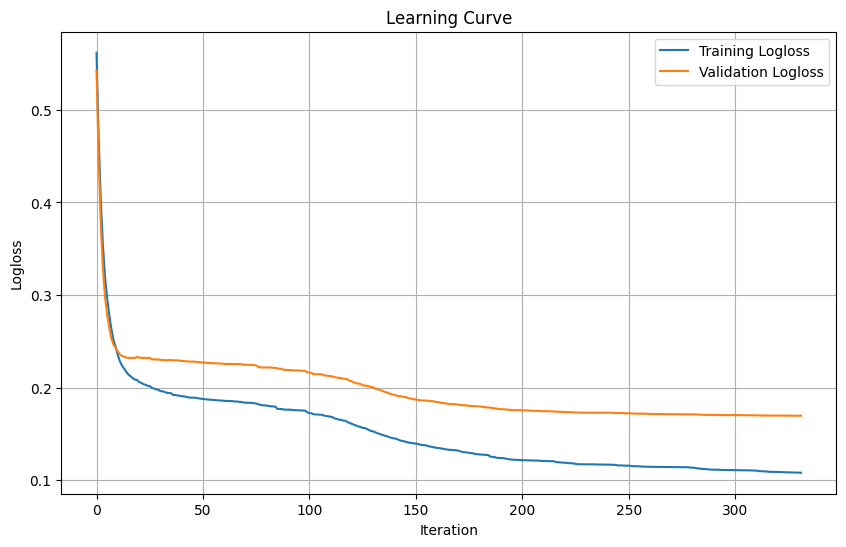

In [19]:
evals_result = final_model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

Final Training Logloss: 0.11638732557293754
Final Validation Logloss: 0.1740072208615152


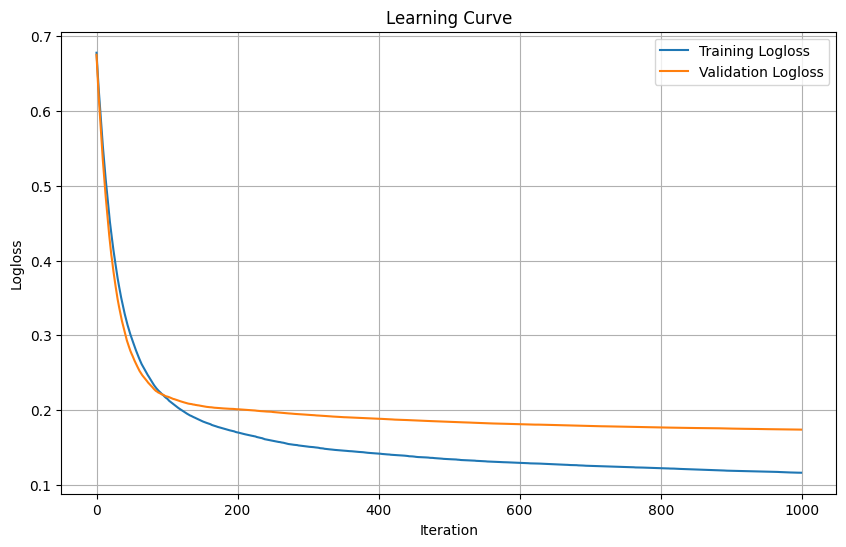

In [20]:
evals_result = model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

0:	total: 115ms	remaining: 1m 54s
200:	total: 19s	remaining: 1m 15s
400:	total: 39s	remaining: 58.2s
600:	total: 59.1s	remaining: 39.2s
800:	total: 1m 18s	remaining: 19.5s
999:	total: 1m 39s	remaining: 0us
0:	total: 151ms	remaining: 2m 30s
200:	total: 19.3s	remaining: 1m 16s
400:	total: 38.8s	remaining: 57.9s
600:	total: 58.1s	remaining: 38.6s
800:	total: 1m 17s	remaining: 19.4s
999:	total: 1m 38s	remaining: 0us
0:	total: 120ms	remaining: 2m
200:	total: 18.3s	remaining: 1m 12s
400:	total: 38.7s	remaining: 57.9s
600:	total: 1m 2s	remaining: 41.3s
800:	total: 1m 23s	remaining: 20.7s
999:	total: 1m 45s	remaining: 0us
0:	total: 149ms	remaining: 2m 28s
200:	total: 22s	remaining: 1m 27s
400:	total: 44.4s	remaining: 1m 6s
600:	total: 1m 5s	remaining: 43.3s
800:	total: 1m 25s	remaining: 21.3s
999:	total: 1m 47s	remaining: 0us
0:	total: 117ms	remaining: 1m 56s
200:	total: 21.8s	remaining: 1m 26s
400:	total: 43.6s	remaining: 1m 5s
600:	total: 1m 4s	remaining: 42.8s
800:	total: 1m 24s	remaining: 

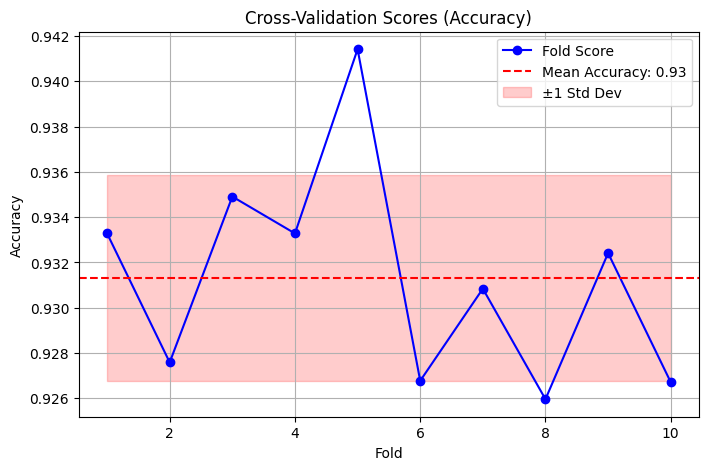

Accuracy Scores for each fold: [0.93327909 0.9275834  0.93490643 0.93327909 0.94141579 0.92676973
 0.93083808 0.92595606 0.93241042 0.9267101 ]
Mean Accuracy: 0.93
Standard Deviation: 0.00


In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung skor cross-validation dan visualisasi
def cross_validate_and_visualize_accuracy(model, X, y, cv=10):
    # Stratified K-Fold untuk mempertahankan distribusi label
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Hitung skor cross-validation dengan metrik akurasi
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf)

    # Rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Visualisasi hasil cross-validation
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, cv + 1), scores, marker='o', linestyle='-', color='b', label='Fold Score')
    plt.axhline(y=mean_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_score:.2f}')
    plt.fill_between(range(1, cv + 1), mean_score - std_score, mean_score + std_score, color='r', alpha=0.2, label='±1 Std Dev')
    plt.title('Cross-Validation Scores (Accuracy)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Cetak hasil skor
    print(f'Accuracy Scores for each fold: {scores}')
    print(f'Mean Accuracy: {mean_score:.2f}')
    print(f'Standard Deviation: {std_score:.2f}')

# Contoh penggunaan
# Ganti model dengan model Anda, misalnya `model`
cross_validate_and_visualize_accuracy(model, X, y, cv=10)

0:	total: 91.9ms	remaining: 1m 17s
100:	total: 6.52s	remaining: 47.9s
200:	total: 13.6s	remaining: 43.3s
300:	total: 20.2s	remaining: 36.5s
400:	total: 27.4s	remaining: 30.2s
500:	total: 34.9s	remaining: 23.8s
600:	total: 43s	remaining: 17.3s
700:	total: 51.9s	remaining: 10.5s
800:	total: 59.6s	remaining: 3.12s
842:	total: 1m 2s	remaining: 0us
0:	total: 67.1ms	remaining: 56.5s
100:	total: 6.46s	remaining: 47.4s
200:	total: 13.8s	remaining: 44.1s
300:	total: 20.8s	remaining: 37.5s
400:	total: 28s	remaining: 30.9s
500:	total: 35.7s	remaining: 24.4s
600:	total: 43.2s	remaining: 17.4s
700:	total: 50.6s	remaining: 10.3s
800:	total: 57.9s	remaining: 3.04s
842:	total: 1m 1s	remaining: 0us
0:	total: 119ms	remaining: 1m 39s
100:	total: 6.62s	remaining: 48.6s
200:	total: 14.1s	remaining: 44.9s
300:	total: 21.3s	remaining: 38.4s
400:	total: 29.4s	remaining: 32.4s
500:	total: 37.3s	remaining: 25.4s
600:	total: 46.3s	remaining: 18.6s
700:	total: 53.2s	remaining: 10.8s
800:	total: 57.6s	remaining: 3

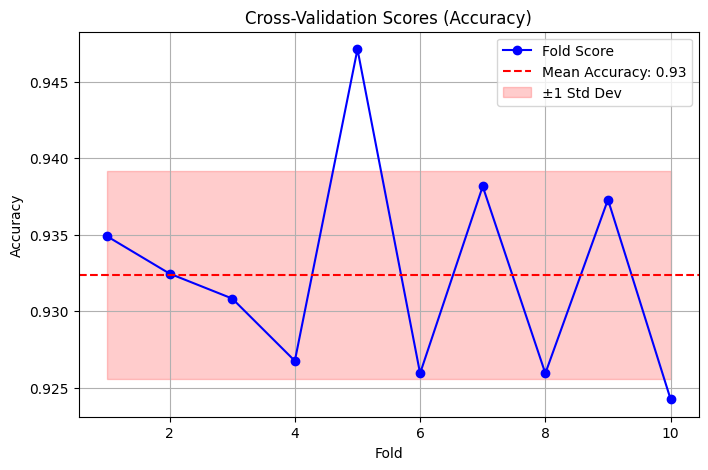

Accuracy Scores for each fold: [0.93490643 0.93246542 0.93083808 0.92676973 0.94711147 0.92595606
 0.93816111 0.92595606 0.93729642 0.9242671 ]
Mean Accuracy: 0.93
Standard Deviation: 0.01


In [22]:
cross_validate_and_visualize_accuracy(final_model, X, y, cv=10)

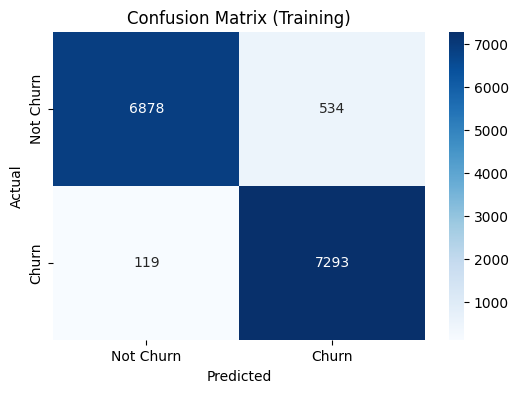

Training Metrics:
Accuracy: 0.96
Precision: 0.93
Recall: 0.98
F1 Score: 0.96
------------------------------


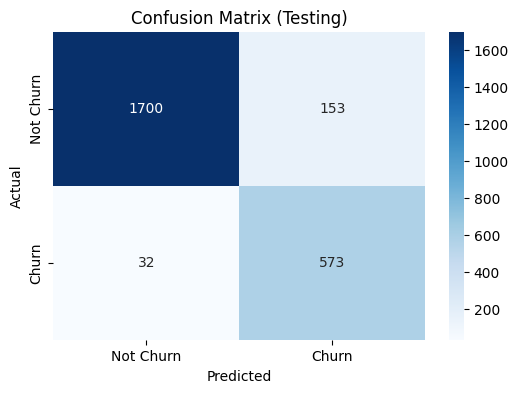

Testing Metrics:
Accuracy: 0.92
Precision: 0.79
Recall: 0.95
F1 Score: 0.86
------------------------------


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan confusion matrix dan metrik evaluasi
def evaluate_model(y_true, y_pred, dataset_name):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f'{dataset_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('-' * 30)

# Prediksi untuk data training dan testing
y_train_pred = final_model.predict(X_train_res)
y_test_pred = final_model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train_res, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

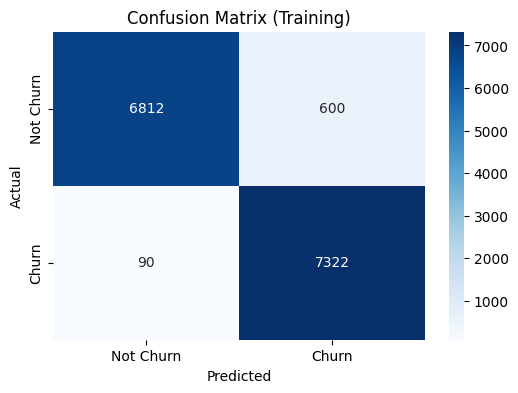

Training Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 0.99
F1 Score: 0.96
------------------------------


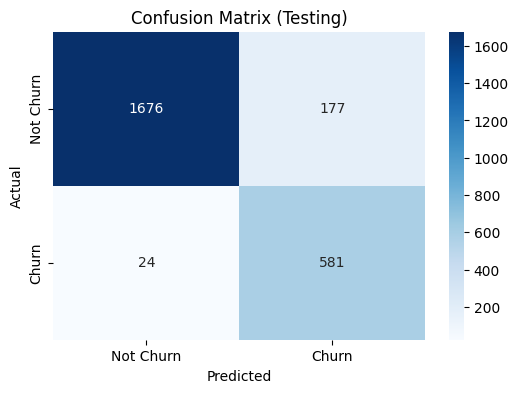

Testing Metrics:
Accuracy: 0.92
Precision: 0.77
Recall: 0.96
F1 Score: 0.85
------------------------------


In [24]:
y_train_pred = model.predict(X_train_res)
y_test_pred = model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train_res, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

In [25]:
df_test = pd.read_csv('D:/Tugas Akhir/Codingan/Development/App/data/df_test_YESUSFIX.csv')
df_test.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM6407,Kota Jakarta Selatan,Laki-laki,1981-03-05,2022-03-13,2023-08-08,Married,3,D3,3.0,...,1.169413e+08,1.719725e+06,1.22500,Mid-term,4.250000,4,1.719725e+06,4,1.719725e+06,3.4
1,EM6881,Tangerang,Laki-laki,1974-04-26,2022-04-11,2023-05-31,Married,0,D3,2.0,...,1.369110e+08,1.053162e+07,1.17375,Mid-term,4.333333,4,2.632904e+06,4,2.632904e+06,4.0
2,EM9588,Kota Depok,Perempuan,1980-01-08,2022-02-22,2023-08-30,Married,3,D1,4.0,...,1.408170e+08,1.955791e+06,1.18625,Mid-term,3.600000,4,1.955791e+06,2,3.911582e+06,3.6
3,EM6817,Kota Jakarta Timur,Perempuan,1985-06-15,2021-09-04,2023-01-13,Married,2,SLTA,10.0,...,3.969525e+07,8.269843e+05,1.13125,Mid-term,1.454545,1,2.480953e+06,1,2.480953e+06,1.0
4,EM0933,Kota Jakarta Timur,Laki-laki,1981-10-31,2022-03-20,2024-09-08,Married,1,SLTA,7.0,...,2.918537e+08,4.864228e+06,1.14125,Mid-term,3.750000,4,2.432114e+06,1,9.728456e+06,4.0


In [26]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 
                       'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9432835820895522
Precision: 1.0
Recall: 0.9432835820895522
F1 Score: 0.9708141321044547


In [27]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 
                       'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9432835820895522
Precision: 1.0
Recall: 0.9432835820895522
F1 Score: 0.9708141321044547
